In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import matplotlib.pylab as pl

data = pd.read_csv("./watermelon3.0α.txt")

In [2]:
# 将标签进行编码
data["好瓜"] = data["好瓜"].apply(lambda x: 1 if x=="是" else 0)

In [3]:
data = data.values

In [4]:
# x.shape=(17*2)
x = data[:, 1:3] 

In [5]:
# y.shape=(17*1)
y = data[:, 3]

Text(0, 0.5, 'Sugar content')

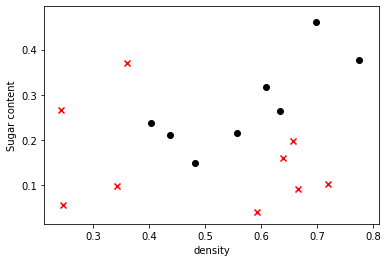

In [6]:
# 散点图可视化
plt.scatter(data[:8, 1], data[:8, 2], c='k', marker='o')
plt.scatter(data[8:, 1], data[8:, 2], c='r', marker='x')

plt.xlabel("density")
plt.ylabel("Sugar content")

In [7]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.5, random_state=0)

In [8]:
import numpy as np

def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s


def J_cost(x, y, beta):
    """
    公式3.27,使其最小化
    x：特征矩阵(此处为17*2)
    y：标签矩阵(此处为17*1)
    beta：待更新参数(此处为3*1， 因为x会在后面加一列1，所以beta的行数为3)
    """
    x_hat = np.c_[x, np.ones((x.shape[0], 1))] # x_hat等于原来的x矩阵加一列1
    beta = beta.reshape(-1,1) # 将beta转换成单列矩阵
    y = y.reshape(-1,1) # 将y也转换成单列矩阵
    
    l_beta = -y * np.dot(x_hat, beta) + np.log(1 + np.exp(np.dot(x_hat, beta)))
    
    return l_beta.sum() 

def gradient(x, y, beta):
    """
    3.27的一阶导数，即公式3.30
    x:特征矩阵  此处为17*2 (行数)*(特征维度)
    y：标签 此处为17*1  （行数）* 列
    beta：3.27中待更新参数 ， （特征维度+1）* 列(1)
    """
    x_hat = np.c_[x, np.ones((x.shape[0], 1))] # 给x添加一列1
    beta = beta.reshape(-1,1) # 将beta转换成列向量，方便之后用矩阵乘法
    y = y.reshape(-1,1) 
    p1 = sigmoid(np.dot(x_hat, beta))
    
    gra = (-x_hat * (y - p1)).sum()
    
    return gra.reshape(-1,1)


def update_parameters_gradDesc(x, y, beta, learning_rate, num_iterations, print_cost):
    """
    x:特征矩阵 17*2
    y：标签 17*1
    learning_rate:学习率
    num_iterations:迭代次数
    print_cost:每迭代100次，打印一下损失函数
    """
    for i in range(num_iterations):
        
        grad = gradient(x, y, beta)
        beta = beta - learning_rate * grad
        
        if(i%100 == 0) & print_cost:
            print("{}th iteration ,cost is {}".format(i, J_cost(x,y,beta)))
    
    return beta


def initialize_beta(n):
    # 返回（n+1）* 1的矩阵beta
    beta = np.random.randn(n + 1, 1)
    return beta

def logistic(x,y,num_iterations=100,learning_rate=0.5, print_cost=True):
    """
    """
    n=x.shape[1]
    beta = initialize_beta(n)
    return update_parameters_gradDesc(x,y,beta,learning_rate,num_iterations,print_cost)


def predict(x,beta):
    x_hat = np.c_[x, np.ones((x.shape[0], 1))]
    p1 = sigmoid(np.dot(x_hat, beta))
    # print(p1)
    p1[p1 >= 0.5] = 1
    p1[p1 < 0.5] = 0
    
    return p1

In [9]:
beta = logistic(x_train, y_train, print_cost=True, learning_rate=0.3, num_iterations=200)

0th iteration ,cost is 6.305570603280238
100th iteration ,cost is 5.850228261917566


In [10]:
from sklearn import metrics
y_pred = predict(x_test,beta)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[3 2]
 [0 4]]
              precision    recall  f1-score   support

         0.0       1.00      0.60      0.75         5
         1.0       0.67      1.00      0.80         4

    accuracy                           0.78         9
   macro avg       0.83      0.80      0.77         9
weighted avg       0.85      0.78      0.77         9



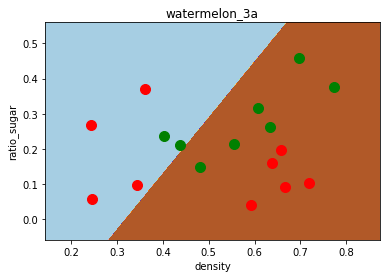

In [11]:
# 在图中显示决策边界
f3 = plt.figure(3) 
h = 0.001
# 确定图的边界
x0_min, x0_max = x[:, 0].min()-0.1, x[:, 0].max()+0.1
x1_min, x1_max = x[:, 1].min()-0.1, x[:, 1].max()+0.1
# 得到网格点坐标矩阵
x0, x1 = np.meshgrid(np.arange(x0_min, x0_max, h),
                     np.arange(x1_min, x1_max, h))

# 将网格坐标进行预测
z = predict(np.c_[x0.ravel(), x1.ravel()], beta) 

# 显示出决策边界
z = z.reshape(x0.shape)
plt.contourf(x0, x1, z, cmap = pl.cm.Paired )

# 作散点图图 
plt.title('watermelon_3a')  
plt.xlabel('density')  
plt.ylabel('ratio_sugar')  
plt.scatter(x[y == 0,0], x[y == 0,1], marker = 'o', color = 'r', s=100, label = 'bad')
plt.scatter(x[y == 1,0], x[y == 1,1], marker = 'o', color = 'g', s=100, label = 'good')
plt.show()

[1. 0. 0. 1. 0. 1. 1. 1. 0.]
[[3 2]
 [1 3]]
              precision    recall  f1-score   support

         0.0       0.75      0.60      0.67         5
         1.0       0.60      0.75      0.67         4

    accuracy                           0.67         9
   macro avg       0.68      0.68      0.67         9
weighted avg       0.68      0.67      0.67         9



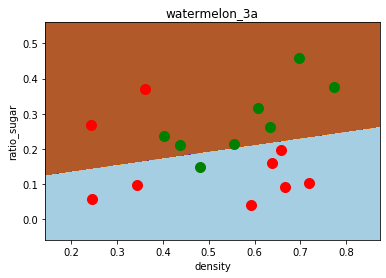

In [12]:
import matplotlib.pylab as pl
lr = LogisticRegression()  
lr.fit(x_train, y_train)

y_pred_sk = lr.predict(x_test)
print(y_pred_sk)
print(metrics.confusion_matrix(y_test, y_pred_sk))
print(metrics.classification_report(y_test, y_pred_sk))

# 在图中显示决策边界
f2 = plt.figure(2) 
h = 0.001
# 确定图的边界
x0_min, x0_max = x[:, 0].min()-0.1, x[:, 0].max()+0.1
x1_min, x1_max = x[:, 1].min()-0.1, x[:, 1].max()+0.1
# 得到网格点坐标矩阵
x0, x1 = np.meshgrid(np.arange(x0_min, x0_max, h),
                     np.arange(x1_min, x1_max, h))

# 将网格坐标进行预测
z = lr.predict(np.c_[x0.ravel(), x1.ravel()]) 

# 显示出决策边界
z = z.reshape(x0.shape)
plt.contourf(x0, x1, z, cmap = pl.cm.Paired )

# 作散点图图 
plt.title('watermelon_3a')  
plt.xlabel('density')  
plt.ylabel('ratio_sugar')  
plt.scatter(x[y == 0,0], x[y == 0,1], marker = 'o', color = 'r', s=100, label = 'bad')
plt.scatter(x[y == 1,0], x[y == 1,1], marker = 'o', color = 'g', s=100, label = 'good')
plt.show()


In [13]:
# def gradient_2(x, y, beta):
# # 求二阶导函数
#     x_hat = np.c_[x, np.ones((x.shape[0], 1))]
#     beta = beta.reshape(-1, 1)
#     y = y.reshape(-1, 1)

#     p1 = sigmoid(np.dot(x_hat, beta))

#     m, n = x.shape
#     P = np.eye(m) * p1 * (1 - p1)

#     return np.dot(np.dot(x_hat.T, P), x_hat)